<h1> Applying KNN Classifier <h1

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<h2> Loading Data <h2>

In [64]:
arr2= np.load('data_array_non_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))



[[4520000 3.372304 101.0 ... 0 1 0]
 [2300000 2.566358 90.0 ... 1 0 0]
 [5500000 1.8229790000000001 95.0 ... 0 1 0]
 ...
 [1500000 1.700323 91.0 ... 0 0 0]
 [2000000 0.901783 86.0 ... 0 0 1]
 [6000000 2.447359 139.0 ... 1 0 0]] ['Average' 'Average' 'Average' ... 'Bad' 'Bad' 'Average']
5253 5253 1314 1314


<h2> Default KNN <h2>

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train); #train the classifier

print ('Testing score: ',clf1.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf1.score (X_train, y_train)) # print the trainig score(accuracy)
y_pred =clf1.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))



#lets print classification Report
print('Classification Report: \n',classification_report(y_test, y_pred))

#Lets print confision matrix
print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

Testing score:  0.7792998477929984
Training Score:  0.8183894917190178
F1 Score: 0.7278695968997996
Classification Report: 
               precision    recall  f1-score   support

     Average       0.81      0.95      0.87      1044
         Bad       0.37      0.16      0.22       181
        Good       0.29      0.02      0.04        89

    accuracy                           0.78      1314
   macro avg       0.49      0.38      0.38      1314
weighted avg       0.71      0.78      0.73      1314

Confusion Matrix values 
 [[993  46   5]
 [152  29   0]
 [ 84   3   2]]


<h2> Determining best n_neighbors <h2>

In [66]:
test_score = []
train_score = []
n_neighbors = []
f1_scores = []

for i in range(2,80):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    n_neighbors.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(n_neighbors,test_score,train_score,f1_scores)),columns = ['n_neighbors','test_score','train_score','f1_scores'])

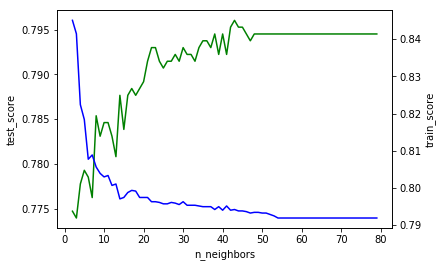

In [67]:
#Plot train and test score as n_neighbors needed to split increases
sns.lineplot(x=df['n_neighbors'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['n_neighbors'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

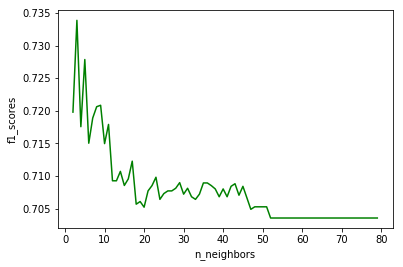

In [68]:
sns.lineplot(x= df['n_neighbors'],y=df['f1_scores'], color="g")
plt.show()

In [69]:
#Based on the f1_score, lets find the best value for n_neighbors
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])
best_n_neighbors = df['n_neighbors'].values[maxF1Score]

Best Row based on f1_score
n_neighbors    3.000000
test_score     0.773973
train_score    0.841424
f1_scores      0.733885
Name: 1, dtype: float64


<h2> Determining best algorithm to compute nearest neighbour <h2>

In [40]:
list_algos = ['auto', 'ball_tree', 'kd_tree', 'brute']

test_score = []
train_score = []
f1_scores = []

for algo in list_algos:
    clf = KNeighborsClassifier(algorithm = algo,n_neighbors=best_n_neighbors)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(list_algos,test_score,train_score,f1_scores)),columns = ['list_algos','test_score','train_score','f1_scores'])

In [41]:
print(df)

  list_algos  test_score  train_score  f1_scores
0       auto    0.785388      0.80316   0.713102
1  ball_tree    0.785388      0.80316   0.713102
2    kd_tree    0.785388      0.80316   0.713102
3      brute    0.785388      0.80316   0.713102


As we can see from the results above, the default 'auto' method works as good as ball_tree and kd_tree. Hence, we can leave it at auto.

<h2> Determining best leaf_size <h2>

In [42]:
test_score = []
train_score = []
leaf_size = []
f1_scores = []

for i in range(2,151):
    clf = KNeighborsClassifier(leaf_size = i,n_neighbors=5)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    leaf_size.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(leaf_size,test_score,train_score,f1_scores)),columns = ['leaf_size','test_score','train_score','f1_scores'])

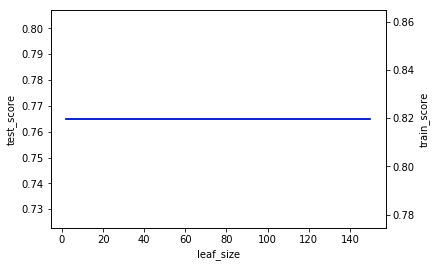

In [43]:
#Plot train and test score as leaf_size needed to split increases
sns.lineplot(x=df['leaf_size'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['leaf_size'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

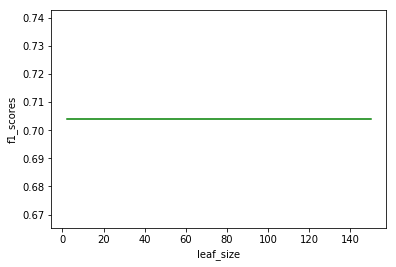

In [44]:
sns.lineplot(x= df['leaf_size'],y=df['f1_scores'], color="g")
plt.show()

As seen above, changing the leaf size has no effect on the F1 measure, so we will keep default.

<h2> Determining best weight function <h2>

In [45]:
list_weights = ['uniform', 'distance']

test_score = []
train_score = []
f1_scores = []

for w in list_weights:
    clf = KNeighborsClassifier(weights = w,n_neighbors=best_n_neighbors)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(list_weights,test_score,train_score,f1_scores)),columns = ['list_weights','test_score','train_score','f1_scores'])

In [46]:
print(df)

  list_weights  test_score  train_score  f1_scores
0      uniform    0.785388      0.80316   0.713102
1     distance    0.761796      1.00000   0.706511


We can see that the uniform performs better on f1_measure and also testi score, so we will leave it as default weight function

<h2 > Determining best power parameter <h2>

In [70]:
test_score = []
train_score = []
pp = []
f1_scores = []

for i in range(1,3):
    clf = KNeighborsClassifier(p = i,n_neighbors=best_n_neighbors)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    pp.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(pp,test_score,train_score,f1_scores)),columns = ['pp','test_score','train_score','f1_scores'])

In [71]:
print(df)

   pp  test_score  train_score  f1_scores
0   1    0.764840     0.843708   0.725992
1   2    0.773973     0.841424   0.733885


We can see that the default parameter euclidean_distance works better, so we will continue with it.

<h2> Results <h2>

In [72]:
#Based on the best n_neighbors, lets see if the model performs consistently for different random data splits

test_score = []
train_score = []
f1_scores = []

clf = KNeighborsClassifier(n_neighbors=best_n_neighbors)
#check 50 times with data
for i in range(50):
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
      
        

df = pd.DataFrame(list(zip(test_score,train_score,f1_scores)),columns = ['test_score','train_score','f1_scores'])   

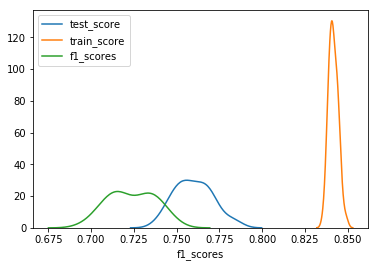

In [73]:
#lets check how the values are distributed when we use random training and testing data

for col in df.columns:
    sns.distplot(df[col],hist=False,label=col)

The distribution for test score is centralized to 0.84, and most of the test score lie close to 0.76. The f1_scores has a range of 0.68 to 0.75, but most are centered around 0.72


Lets evaluate the final classifier

Testing score:  0.773972602739726
Training Score:  0.8402817437654674
F1 Score: 0.7440198839850698
Confusion Matrix values 
 [[968  73  12]
 [119  39   5]
 [ 85   3  10]]


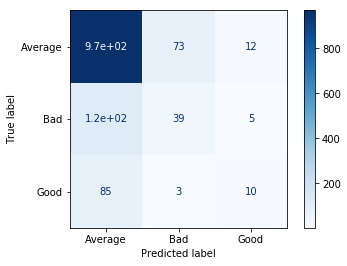

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#lets plot the f1 scores for the final model
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

print ('Testing score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('Training Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

#Lets print confision matrix
labels =['Average','Bad','Good']

print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [77]:
#lets print classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.83      0.92      0.87      1053
         Bad       0.34      0.24      0.28       163
        Good       0.37      0.10      0.16        98

    accuracy                           0.77      1314
   macro avg       0.51      0.42      0.44      1314
weighted avg       0.73      0.77      0.74      1314

